
Features in Datasets

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg)|
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above   normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |





In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
from sklearn import preprocessing

In [3]:
# Read Dataset
Data1 = pd.read_csv("cardio_train.csv",delimiter=';',encoding = "ISO-8859-1")
print(Data1.head())

   id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0  ...     1      0     0       1       0
1   1  20228       1     156    85.0  ...     1      0     0       1       1
2   2  18857       1     165    64.0  ...     1      0     0       0       1
3   3  17623       2     169    82.0  ...     1      0     0       1       1
4   4  17474       1     156    56.0  ...     1      0     0       0       0

[5 rows x 13 columns]


# Data Preprocessing

In [4]:
# Print Data shape
Data1.shape

(70000, 13)

In [5]:
# Check duplicates value
a = Data1.duplicated()
sum(a)

0

from above we get to know that there is no dulicate values

In [6]:
# Create dummies of column gender
Data1 = pd.get_dummies(Data1, columns=['gender'])
Data1.head()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_1,gender_2
0,0,18393,168,62.0,110,80,1,1,0,0,1,0,0,1
1,1,20228,156,85.0,140,90,3,1,0,0,1,1,1,0
2,2,18857,165,64.0,130,70,3,1,0,0,0,1,1,0
3,3,17623,169,82.0,150,100,1,1,0,0,1,1,0,1
4,4,17474,156,56.0,100,60,1,1,0,0,0,0,1,0


In [7]:
# Rename the columns 
Data1 = Data1.rename(columns = {'gender_1': 'female', 'gender_2': 'male'})

In [8]:
# print summary of dataset
Data1.describe()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,female,male
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.650429,0.349571
std,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.476838,0.476838
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Print names of coumns present in dataset
for col in Data1.columns:
  print(col)

id
age
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio
female
male


In [10]:
# Check NAN values
Data1.isnull().sum()

id             0
age            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
female         0
male           0
dtype: int64

In [11]:
# Check data types of columns
Data1.dtypes

id               int64
age              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
female           uint8
male             uint8
dtype: object

In [12]:
# check variance of columns
Data1.var()

id             8.323976e+08
age            6.087331e+06
height         6.740617e+01
weight         2.072378e+02
ap_hi          2.371952e+04
ap_lo          3.552189e+04
cholesterol    4.627405e-01
gluc           3.274933e-01
smoke          8.036307e-02
alco           5.088079e-02
active         1.577512e-01
cardio         2.500035e-01
female         2.273745e-01
male           2.273745e-01
dtype: float64

In [13]:
# Change datatype of columns into int
Data1['weight'] = Data1['weight'].astype(int)
Data1['female'] = Data1['female'].astype(int)
Data1['male'] = Data1['male'].astype(int)

In [14]:
# Again check data types of columns
Data1.dtypes

id             int64
age            int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
female         int64
male           int64
dtype: object

In [15]:
# Change Age from days to year
Data1['Age'] = (Data1['age']/365).round(decimals=2)

In [16]:
# Drop old column age
Data1.drop(['age'],axis=1,inplace=True)

In [17]:
# Change datatype of Age column from float integer
Data1['Age']=Data1['Age'].astype(int)

In [18]:
# Print first five line of our dataset
Data1.head()

,id,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,female,male,Age
0,0,168,62,110,80,1,1,0,0,1,0,0,1,50
1,1,156,85,140,90,3,1,0,0,1,1,1,0,55
2,2,165,64,130,70,3,1,0,0,0,1,1,0,51
3,3,169,82,150,100,1,1,0,0,1,1,0,1,48
4,4,156,56,100,60,1,1,0,0,0,0,1,0,47


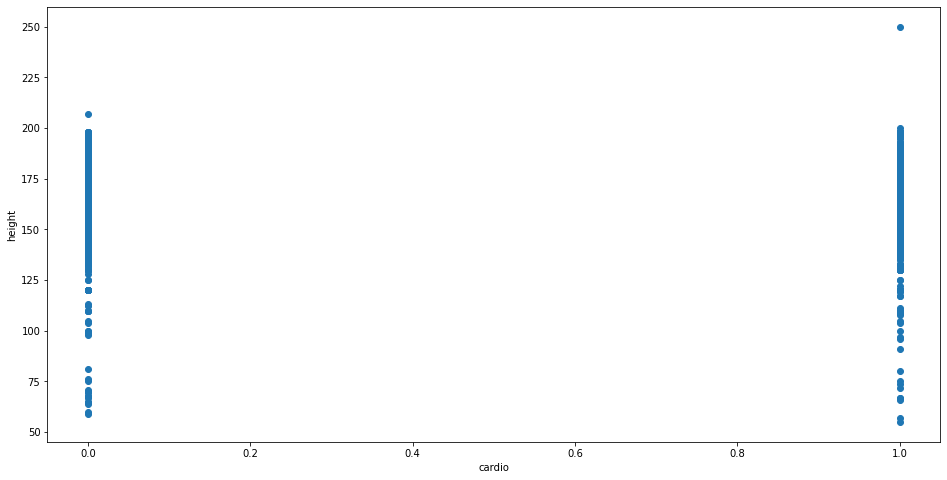

In [19]:
# Plot scatter plot between two columns
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(Data1['cardio'], Data1['height'])
ax.set_xlabel('cardio')
ax.set_ylabel('height')
plt.show()

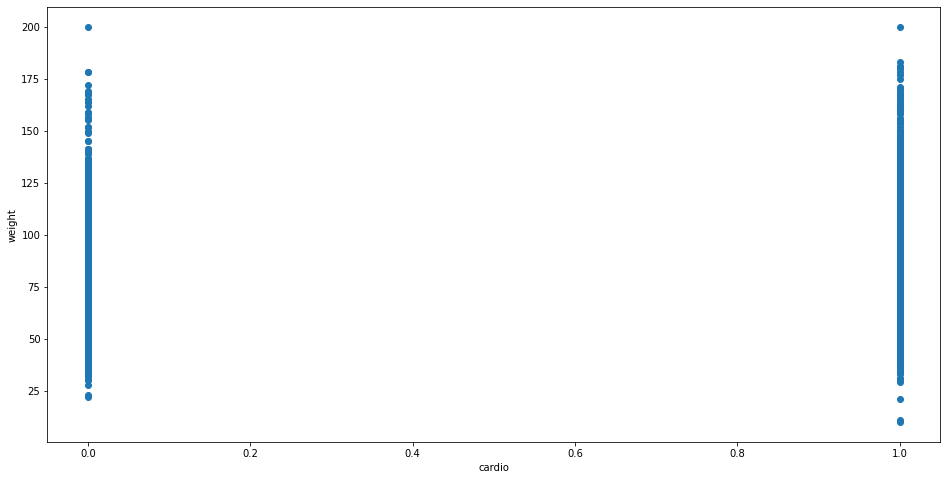

In [20]:
# Plot scatter plot between two columns
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(Data1['cardio'], Data1['weight'])
ax.set_xlabel('cardio')
ax.set_ylabel('weight')
plt.show()

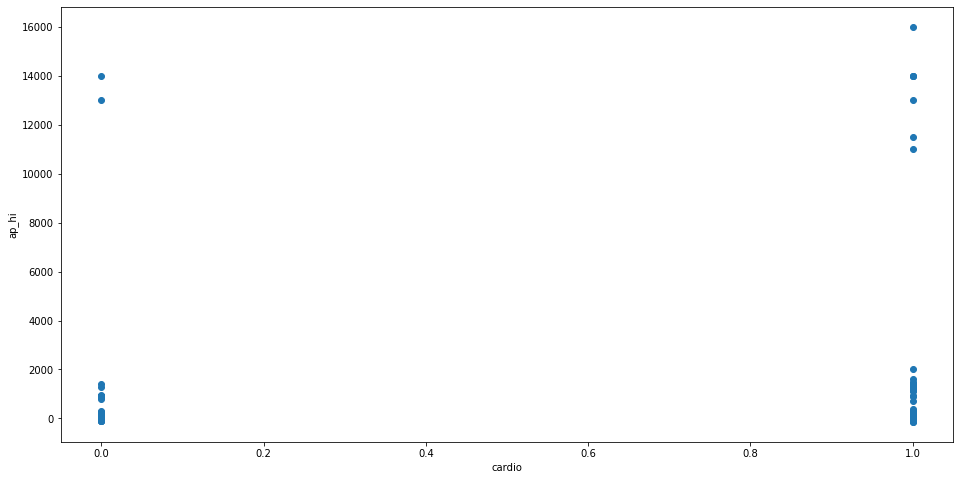

In [21]:
# Plot scatter plot between two columns
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(Data1['cardio'], Data1['ap_hi'])
ax.set_xlabel('cardio')
ax.set_ylabel('ap_hi')
plt.show()

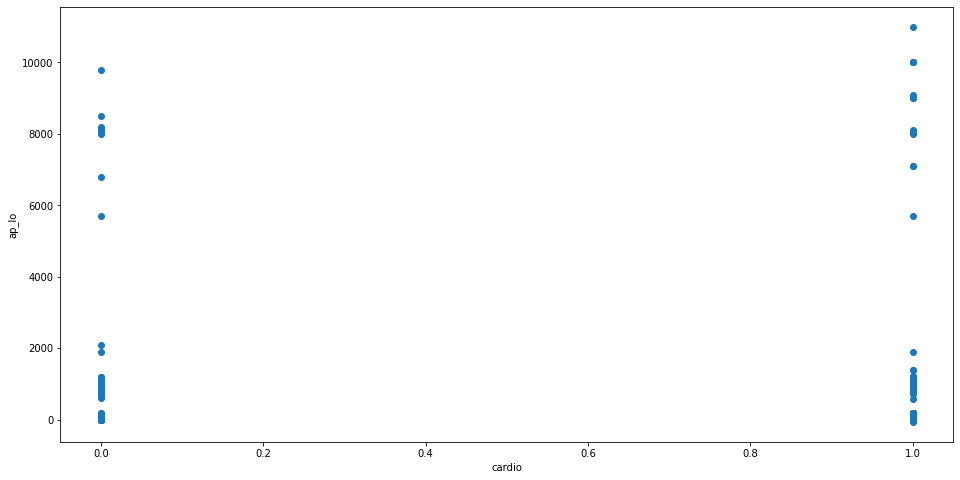

In [22]:
# Plot scatter plot between two columns
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(Data1['cardio'], Data1['ap_lo'])
ax.set_xlabel('cardio')
ax.set_ylabel('ap_lo')
plt.show()

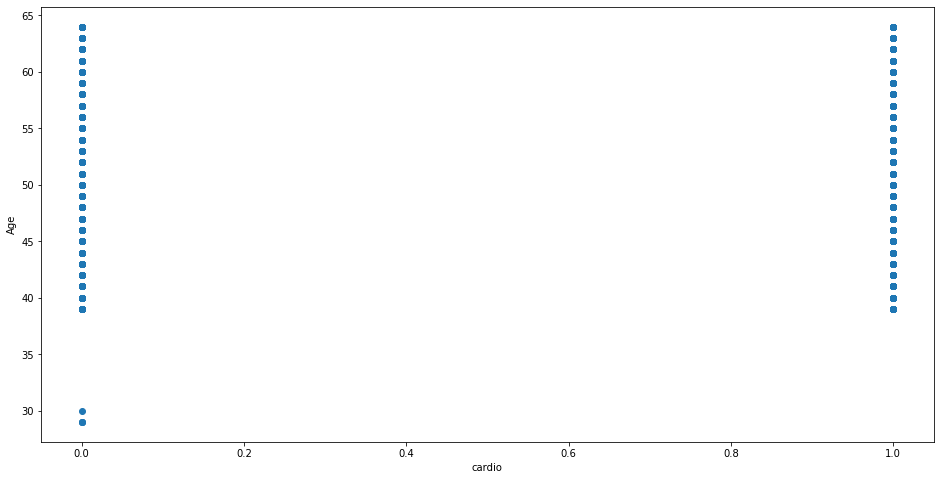

In [23]:
# Plot scatter plot between two columns
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(Data1['cardio'], Data1['Age'])
ax.set_xlabel('cardio')
ax.set_ylabel('Age')
plt.show()

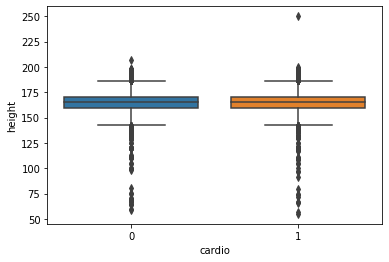

In [24]:
# Plot boxplot to check outliers
sns.boxplot(x=Data1["cardio"],y=Data1['height'])

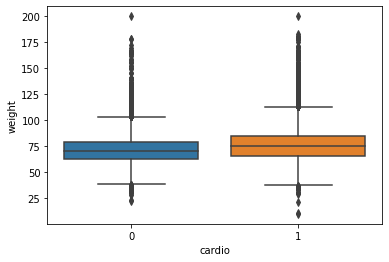

In [25]:
#Plot boxplot to check outliers
sns.boxplot(x=Data1["cardio"],y=Data1['weight'])

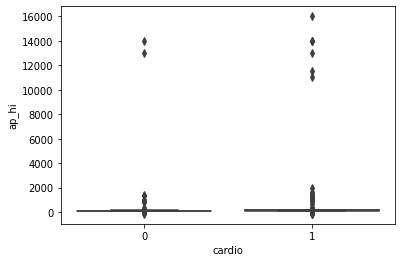

In [26]:
#Plot boxplot to check outliers
sns.boxplot(x=Data1["cardio"],y=Data1['ap_hi'])

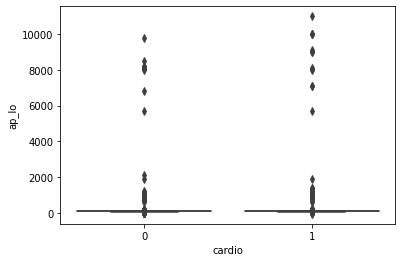

In [ ]:
#Plot boxplot to check outliers
sns.boxplot(x=Data1["cardio"],y=Data1['ap_lo'])

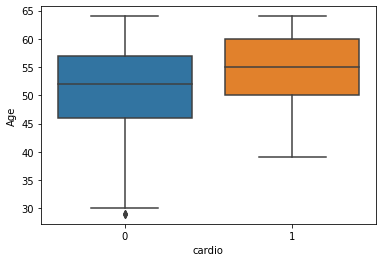

In [27]:
#Plot boxplot to check outliers
sns.boxplot(x=Data1["cardio"],y=Data1['Age'])

# Important Insights

In [28]:
# Print number of person having disease cardiovascular.
Data1["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

0 repersents that person is not having cardio, 1 repersents that person is not having cardio
*  35021 are not having disease
*  34979 are having disease

In [29]:
print("Total female",Data1["female"].value_counts())
print("Total male",Data1["male"].value_counts())

Total female 1    45530
0    24470
Name: female, dtype: int64
Total male 0    45530
1    24470
Name: male, dtype: int64


45530 are female and 24470 are male

In [30]:
females_without_cardiovascular=np.logical_and(Data1['female']==1,Data1['cardio']==0).sum()
print("females not having cardiovascular disease = ",females_without_cardiovascular)
females_with_cardiovascular=np.logical_and(Data1['female']==1,Data1['cardio']==1).sum()
print("females having cardiovascular disease = ",females_with_cardiovascular)
males_without_cardiovascular=np.logical_and(Data1['male']==1,Data1['cardio']==0).sum()
print("Males not having cardiovascular disease = ",males_without_cardiovascular)
males_with_cardiovascular=np.logical_and(Data1['male']==1,Data1['cardio']==1).sum()
print("Males having cardiovascular disease = ",males_with_cardiovascular)

females not having cardiovascular disease =  22914
females having cardiovascular disease =  22616
Males not having cardiovascular disease =  12107
Males having cardiovascular disease =  12363


In [31]:
print("Number of people who smoke = ",Data1[Data1['smoke']==1].shape[0])
print("Number of people who don't smoke = ",Data1[Data1['smoke']==0].shape[0])

Number of people who smoke =  6169
Number of people who don't smoke =  63831


In [32]:
Smokers_without_cardiovascular=np.logical_and(Data1['smoke']==1,Data1['cardio']==0).sum()
print("Smokers not having cardiovascular disease = ",Smokers_without_cardiovascular)
Smokers_with_cardiovascular=np.logical_and(Data1['smoke']==1,Data1['cardio']==1).sum()
print("Smokers having cardiovascular disease = ",Smokers_with_cardiovascular)
Non_Smokers_without_cardiovascular=np.logical_and(Data1['smoke']==0,Data1['cardio']==0).sum()
print("Non_Smokers not having cardiovascular disease = ",Non_Smokers_without_cardiovascular)
Non_Smokers_with_cardiovascular=np.logical_and(Data1['smoke']==0,Data1['cardio']==1).sum()
print("Non_Smokers having cardiovascular disease = ",Non_Smokers_with_cardiovascular)

Smokers not having cardiovascular disease =  3240
Smokers having cardiovascular disease =  2929
Non_Smokers not having cardiovascular disease =  31781
Non_Smokers having cardiovascular disease =  32050


In [33]:
print("Number of people who consume alcohol = ",Data1[Data1['alco']==1].shape[0])
print("Number of people who don't consume alcohol = ",Data1[Data1['alco']==0].shape[0])

Number of people who consume alcohol =  3764
Number of people who don't consume alcohol =  66236


In [34]:
ac_without_cardiovascular=np.logical_and(Data1['alco']==1,Data1['cardio']==0).sum()
print("Alcohol consumer not having cardiovascular disease = ",ac_without_cardiovascular)
ac_with_cardiovascular=np.logical_and(Data1['alco']==1,Data1['cardio']==1).sum()
print("Alcohol consumer having cardiovascular disease = ",ac_with_cardiovascular)
nac_without_cardiovascular=np.logical_and(Data1['alco']==0,Data1['cardio']==0).sum()
print("Non alcohol consumer not having cardiovascular disease = ",nac_without_cardiovascular)
nac_with_cardiovascular=np.logical_and(Data1['alco']==0,Data1['cardio']==1).sum()
print("Non alcohol consumer having cardiovascular disease = ",nac_with_cardiovascular)

Alcohol consumer not having cardiovascular disease =  1941
Alcohol consumer having cardiovascular disease =  1823
Non alcohol consumer not having cardiovascular disease =  33080
Non alcohol consumer having cardiovascular disease =  33156


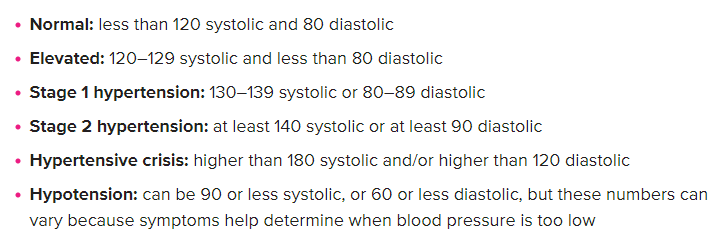

In [35]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(Data1[Data1['ap_lo']> Data1['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1234 cases


In [36]:
Data1.drop(Data1[Data1['ap_lo']>Data1['ap_hi']].index,inplace=True)

In [37]:
Data1.shape

(68766, 14)

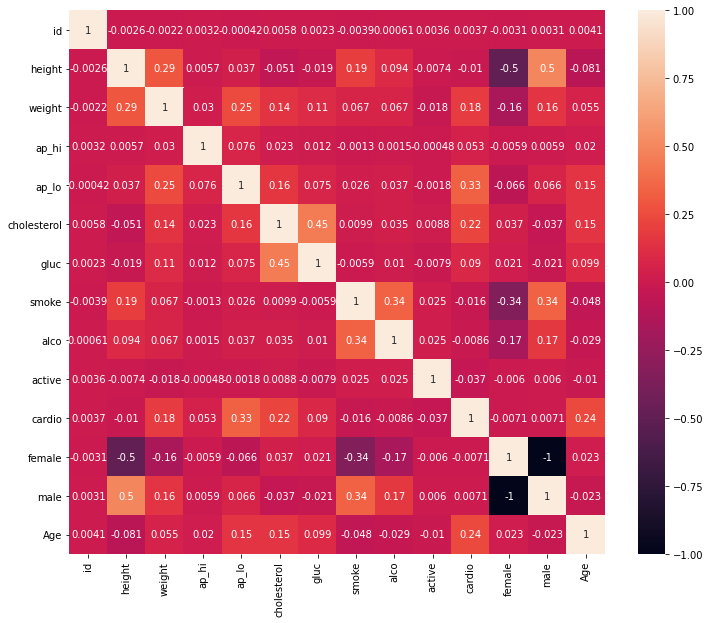

In [38]:
# plot correlation map
plt.figure(figsize=(12,10))
corrMatrix=Data1.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

# Building Classification Models

In [39]:
# Divide dataset into label and values
x = Data1.iloc[:, [1,2,3,4,5,6,7,8,9,11,12,13]]
y =  Data1.iloc[:,-4].values

In [40]:
# Apply MinMaxScaler on labels and values
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
# Scaled feature
x = min_max_scaler.fit_transform(x)

In [41]:
# Split Dataset into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.4, random_state = 0)

In [42]:
print(x_train)
print(y_train)

[[0.6        0.38095238 0.00737131 ... 0.         1.         0.6       ]
 [0.62051282 0.28571429 0.00612194 ... 1.         0.         0.34285714]
 [0.56923077 0.31746032 0.00674663 ... 1.         0.         0.6       ]
 ...
 [0.54871795 0.33333333 0.00674663 ... 1.         0.         0.94285714]
 [0.53333333 0.44973545 0.00612194 ... 1.         0.         0.28571429]
 [0.58461538 0.29100529 0.00724638 ... 1.         0.         0.48571429]]
[1 0 1 ... 1 0 0]


In [43]:
y_train

array([1, 0, 1, ..., 1, 0, 0])

In [44]:
x_train

array([[0.6       , 0.38095238, 0.00737131, ..., 0.        , 1.        ,
        0.6       ],
       [0.62051282, 0.28571429, 0.00612194, ..., 1.        , 0.        ,
        0.34285714],
       [0.56923077, 0.31746032, 0.00674663, ..., 1.        , 0.        ,
        0.6       ],
       ...,
       [0.54871795, 0.33333333, 0.00674663, ..., 1.        , 0.        ,
        0.94285714],
       [0.53333333, 0.44973545, 0.00612194, ..., 1.        , 0.        ,
        0.28571429],
       [0.58461538, 0.29100529, 0.00724638, ..., 1.        , 0.        ,
        0.48571429]])

# LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Predict
lg_pred = lg.predict(x_test)
lg_pred

array([0, 0, 1, ..., 0, 1, 0])

In [47]:
# Check Accuracies
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,lg_pred)
print(cm)
accuracy_score(y_test, lg_pred)


[[10093  3753]
 [ 4646  9015]]


0.6946595412076926

In [48]:
# Calculate score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test,lg_pred)
precision =  precision_score(y_test,lg_pred,average="weighted")
recall = recall_score(y_test,lg_pred,average="weighted")
f1 = f1_score(y_test,lg_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.6946595412076926
Precision - 0.6953503901498647
Recall- 0.6946595412076926
f1 - 0.6942704641293113


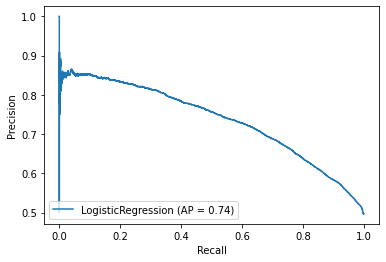

In [49]:
# Plot Precision and recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lg,x_test,y_test)

# K NEIGHBORS CLASSIFIER

In [50]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
# Predict
kn_pred = kn.predict(x_test)
kn_pred

array([1, 1, 1, ..., 0, 0, 0])

In [53]:
# accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,kn_pred)
print(cm)
accuracy_score(y_test, kn_pred)

[[9233 4613]
 [4844 8817]]


0.6561966045006725

In [54]:
# Calculate score
accuracy = accuracy_score(y_test,kn_pred)
precision =  precision_score(y_test,kn_pred,average="weighted")
recall = recall_score(y_test,kn_pred,average="weighted")
f1 = f1_score(y_test,kn_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.6561966045006725
Precision - 0.6562018336277168
Recall- 0.6561966045006725
f1 - 0.6561529299586605


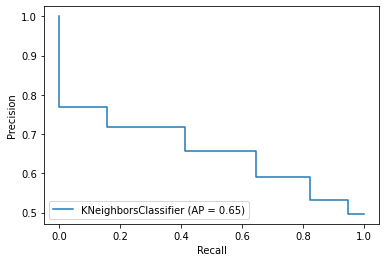

In [55]:
# Plot Precision and Recall curve
disp = plot_precision_recall_curve(kn,x_test,y_test)

# SVC

In [56]:
from sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
#Predict
sv_pred = sv.predict(x_test)
sv_pred

array([0, 0, 1, ..., 0, 1, 0])

In [58]:
# Calculate Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,sv_pred)
print(cm)
accuracy_score(y_test, sv_pred)

[[10350  3496]
 [ 4894  8767]]


0.6949867306503799

In [59]:
# Calculate score
accuracy = accuracy_score(y_test,sv_pred)
precision =  precision_score(y_test,sv_pred,average="weighted")
recall = recall_score(y_test,sv_pred,average="weighted")
f1 = f1_score(y_test,sv_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.6949867306503799
Precision - 0.6968142968414641
Recall- 0.6949867306503799
f1 - 0.6940916522323513


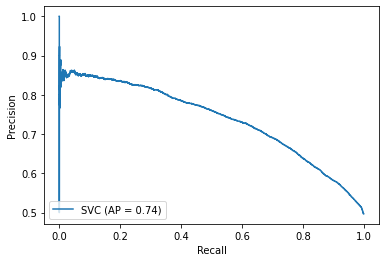

In [60]:
# Plot Precision and recall curve
disp = plot_precision_recall_curve(sv,x_test,y_test)

# SVC (KERNEL="RBF")

In [61]:
from sklearn.svm import SVC
kernel = SVC(kernel='rbf')
kernel.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
# Predict
kernel_pred = kernel.predict(x_test)
kernel_pred

array([1, 0, 1, ..., 0, 1, 0])

In [63]:
# Calculate Accuracy
cm = confusion_matrix(y_test,kernel_pred)
print(cm)
accuracy_score(y_test, kernel_pred)

[[9958 3888]
 [4652 9009]]


0.689533573272258

In [64]:
# Calculate score
accuracy = accuracy_score(y_test,kernel_pred)
precision =  precision_score(y_test,kernel_pred,average="weighted")
recall = recall_score(y_test,kernel_pred,average="weighted")
f1 = f1_score(y_test,kernel_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.689533573272258
Precision - 0.6900042605281478
Recall- 0.689533573272258
f1 - 0.6892357182032391


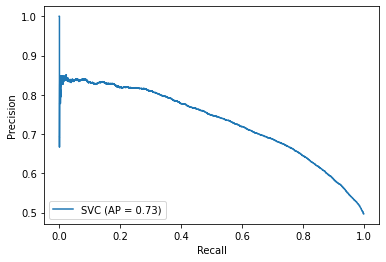

In [65]:
# Plot Precision and recall curve
disp = plot_precision_recall_curve(kernel,x_test,y_test)

# GaussianNB

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
# Predict
nb_pred = nb.predict(x_test)
nb_pred

array([0, 0, 1, ..., 0, 1, 0])

In [68]:
# Calculate Accuracy
cm = confusion_matrix(y_test,nb_pred)
print(cm)
accuracy_score(y_test,nb_pred)

[[11466  2380]
 [ 7256  6405]]


0.649689170029447

In [69]:
# Calculate score
accuracy = accuracy_score(y_test,nb_pred)
precision =  precision_score(y_test,nb_pred,average="weighted")
recall = recall_score(y_test,nb_pred,average="weighted")
f1 = f1_score(y_test,nb_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.649689170029447
Precision - 0.6703668518544471
Recall- 0.649689170029447
f1 - 0.637863560084035


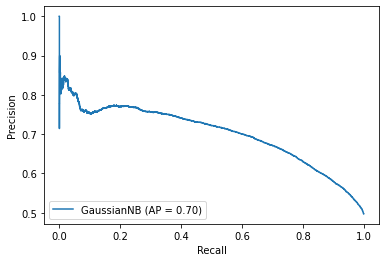

In [70]:
# Plot Precision and recall curve
disp = plot_precision_recall_curve(nb,x_test,y_test)

# DECISION TREE CLASSIFIER

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
# Predcit
dt_pred = dt.predict(x_test)
dt_pred

array([1, 1, 1, ..., 0, 1, 1])

In [73]:
# Accuracy
cm = confusion_matrix(y_test,dt_pred)
print(cm)
accuracy_score(y_test,dt_pred)

[[8915 4931]
 [5158 8503]]


0.6332206347475188

In [74]:
# Calculate score
accuracy = accuracy_score(y_test,dt_pred)
precision =  precision_score(y_test,dt_pred,average="weighted")
recall = recall_score(y_test,dt_pred,average="weighted")
f1 = f1_score(y_test,dt_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.6332206347475188
Precision - 0.6332162089656573
Recall- 0.6332206347475188
f1 - 0.6331752887506448


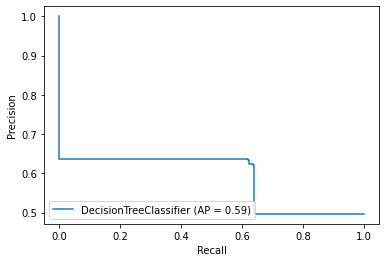

In [75]:
# Plot Precision and recall curve
disp = plot_precision_recall_curve(dt,x_test,y_test)

# RANDOM FOREST CLASSIFIER

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
# Predict
rf_pred = rf.predict(x_test)
rf_pred

array([0, 0, 1, ..., 0, 1, 1])

In [78]:
# calculate accuracy
cm = confusion_matrix(y_test,rf_pred)
print(cm)
accuracy_score(y_test,rf_pred)

[[9920 3926]
 [4176 9485]]


0.705456792816374

In [79]:
# Calculate score
accuracy = accuracy_score(y_test,rf_pred)
precision =  precision_score(y_test,rf_pred,average="weighted")
recall = recall_score(y_test,rf_pred,average="weighted")
f1 = f1_score(y_test,rf_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.705456792816374
Precision - 0.7054886891951498
Recall- 0.705456792816374
f1 - 0.7054144479811393


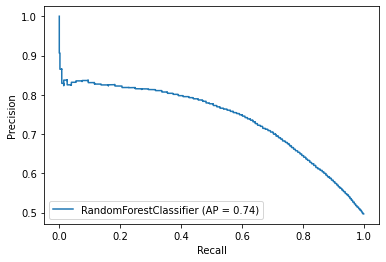

In [80]:
# Plot Precision and recall curve
disp = plot_precision_recall_curve(rf,x_test,y_test)

#  XGBOOST

In [85]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [86]:
# Prediction
xgb_pred = xgb.predict(x_test)
xgb_pred

array([1, 0, 1, ..., 0, 1, 0])

In [87]:
# Calculate Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,xgb_pred)
print(cm)
accuracy_score(y_test,xgb_pred)

[[10793  3053]
 [ 4323  9338]]


0.7318500745264842

In [88]:
# Calculate score
accuracy = accuracy_score(y_test,xgb_pred)
precision =  precision_score(y_test,xgb_pred,average="weighted")
recall = recall_score(y_test,xgb_pred,average="weighted")
f1 = f1_score(y_test,xgb_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.7318500745264842
Precision - 0.7336784021568572
Recall- 0.7318500745264842
f1 - 0.7311933627926023


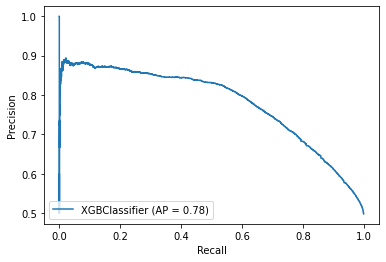

In [89]:
# Calculate precision and recall score
disp = plot_precision_recall_curve(xgb,x_test,y_test)

# GRADIENT BOOSTING CLASSIFIER

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
# Predict
gb_clf_pred = gb_clf.predict(x_test)
gb_clf_pred

array([1, 0, 1, ..., 0, 1, 0])

In [92]:
# Calculate Accuracy
cm = confusion_matrix(y_test,gb_clf_pred)
print(cm)
accuracy_score(y_test,gb_clf_pred)

[[11033  2813]
 [ 4840  8821]]


0.721779910568219

In [93]:
# Calculate score
accuracy = accuracy_score(y_test,gb_clf_pred)
precision =  precision_score(y_test,gb_clf_pred,average="weighted")
recall = recall_score(y_test,gb_clf_pred,average="weighted")
f1 = f1_score(y_test,gb_clf_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.721779910568219
Precision - 0.726431907886015
Recall- 0.721779910568219
f1 - 0.7201204823095513


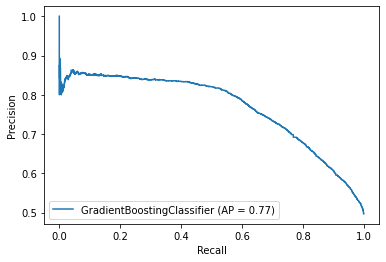

In [94]:
# Plot precision recall curve
disp = plot_precision_recall_curve(gb_clf,x_test,y_test)

# SGDCLASSIFIER

In [95]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x, y)
SGDClassifier(max_iter=5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
# Prediction
clf_pred = clf.predict(x_test)
clf_pred

array([0, 0, 1, ..., 0, 1, 0])

In [97]:
# calculate accuracy
cm = confusion_matrix(y_test,clf_pred)
print(cm)
accuracy_score(y_test,clf_pred)

[[11799  2047]
 [ 7174  6487]]


0.6647762387755844

In [98]:
# Calculate score
accuracy = accuracy_score(y_test,clf_pred)
precision =  precision_score(y_test,clf_pred,average="weighted")
recall = recall_score(y_test,clf_pred,average="weighted")
f1 = f1_score(y_test,clf_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.6647762387755844
Precision - 0.6905449164182867
Recall- 0.6647762387755844
f1 - 0.6522426429690235


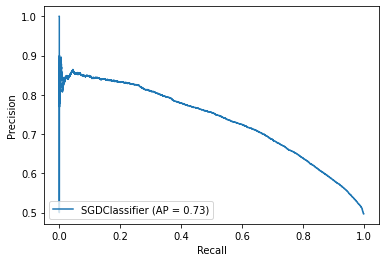

In [99]:
# Plot precision recall curve
disp = plot_precision_recall_curve(clf,x_test,y_test)

# ADABOSSTCLASSIFIER

In [100]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = ada.fit(x_train, y_train)

#Predict the response for test dataset
ada_pred = model.predict(x_test)
print(ada_pred)

[1 0 1 ... 0 1 0]


In [101]:
# Calculate Accuracy
cm = confusion_matrix(y_test,ada_pred)
print(cm)
accuracy_score(y_test,ada_pred)

[[11076  2770]
 [ 4744  8917]]


0.726833169738612

In [102]:
# Calculate score
accuracy = accuracy_score(y_test,ada_pred)
precision =  precision_score(y_test,ada_pred,average="weighted")
recall = recall_score(y_test,ada_pred,average="weighted")
f1 = f1_score(y_test,ada_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

Accuracy - 0.726833169738612
Precision - 0.7313440895248613
Recall- 0.726833169738612
f1 - 0.7252849768683806


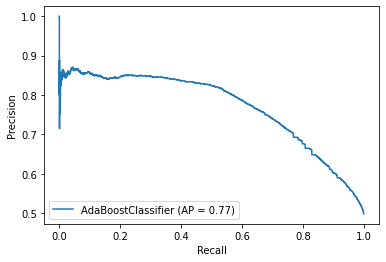

In [103]:
# Plot precision recall score
disp = plot_precision_recall_curve(ada,x_test,y_test)

Accuracy Score of Different Clssification Models:
1. LOGISTIC REGRESSION : 0.6946595412076926
2. K NEIGHBORS CLASSIFIER : 0.6561966045006725
3. SVC : 0.6949867306503799
4. SVC("RBF"): 0.689533573272258
5. GaussionNB : 0.649689170029447
6. DECISION TREE CLASSIFIER : 0.6332206347475188
7. RANDOM FOREST CLASSIFIER : 0.705456792816374
8. XGBOOST : 0.7318500745264842
9. GRADIENT BOOSTING CLASSIFIER : 0.721779910568219
10. SGDCLASSIFIER : 0.6647762387755844
11. ADABOOSTCLASSIFIER : 0.726833169738612


From above we can find conclusion that classifier XGBOOST is predicting best among all the classifier with accuracy 0.73185